In [1]:
# Hubbble contant ((km/s) / Mpc)
H0 = 67.66

# Hubbble contant convert to (1 / Gyr)
H0 = H0 * 0.00102271

# Density parameter of radiation
Or0 = 0.0014936944554559174

# Density parameter of matter
Om0 = 0.30966

# Density parameter of dark energy
Ode0 = 0.6888463055445441

# Total density parameter
Oall0 = Or0 + Om0 + Ode0
print(Oall0)

1.0


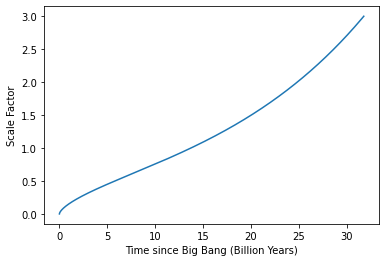

In [2]:
# Import necessary libraries
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# scale factor as range of numbers from 0 to 3
a = np.linspace(1e-10, 3, 5000)

# Calculate the term in the integral
expr = lambda a: 1 / np.sqrt(Or0/a**2 + Om0/a + Ode0*a**2)

# Calculate t
t = np.array([integrate.quad(expr, 0, i)[0]/H0 for i in a])

# Plot to see relation between t and a
plt.plot(t, a)
plt.xlabel('Time since Big Bang (Billion Years)')
plt.ylabel('Scale Factor')
plt.show()

In [3]:
# Polynomial coefficients
coefs = np.polyfit(t, a, 9)

# scale_factor as one-dimensional polynomial class
scale_factor = np.poly1d(coefs)

# Show scale_factor as polynomial expression (latex)
import sympy as sp
from sympy.abc import t
sf = sp.Poly(scale_factor.coef,t).as_expr()
sf

7.20942087754289e-12*t**9 - 1.1130043392128e-9*t**8 + 7.289873288699e-8*t**7 - 2.63960635079337e-6*t**6 + 5.77554731935965e-5*t**5 - 0.000785177786841648*t**4 + 0.00664667391399752*t**3 - 0.0341129607164939*t**2 + 0.159358402006829*t + 0.0201634685301396

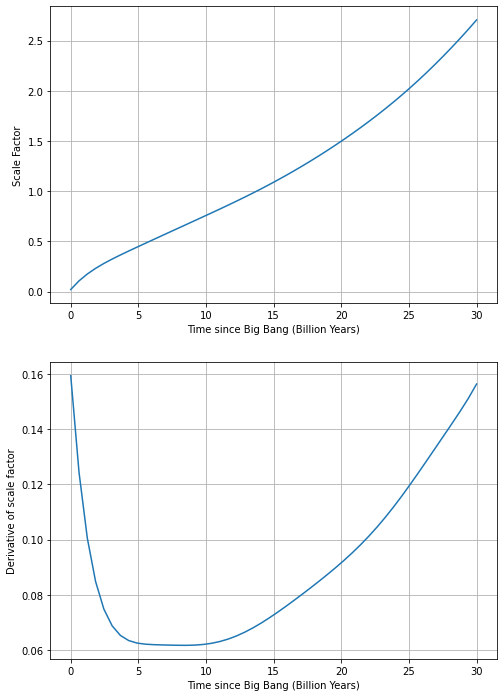

In [4]:
tt = np.linspace(1e-10, 30)
aa = scale_factor(tt)
aa_dot = scale_factor.deriv(1)(tt)

fig, ax = plt.subplots(2,1, figsize=(8,12))

ax[0].plot(tt, aa)
ax[1].plot(tt, aa_dot)

ax[0].set_xlabel('Time since Big Bang (Billion Years)')
ax[0].set_ylabel('Scale Factor')
ax[0].grid()

ax[1].set_xlabel('Time since Big Bang (Billion Years)')
ax[1].set_ylabel('Derivative of scale factor')
ax[1].grid()

plt.show()

In [5]:
sf

7.20942087754289e-12*t**9 - 1.1130043392128e-9*t**8 + 7.289873288699e-8*t**7 - 2.63960635079337e-6*t**6 + 5.77554731935965e-5*t**5 - 0.000785177786841648*t**4 + 0.00664667391399752*t**3 - 0.0341129607164939*t**2 + 0.159358402006829*t + 0.0201634685301396

In [11]:
sp.init_printing()

In [12]:
sf